In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from drl_grams import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
import os

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Genetic Algorithms

In the directory `genetic_algorithm_results/` the results obtained using genetic algorithms can be found. Different subdirectories represent different combinations of hyperparameters. First, we will study 20 samples obtained using three different fitness functions:

- **reward based**: (reward_based) emulates RL reward from [1], in the sense that it accumulates over time steps rewarding better fidelity and discounting for each extra step with a reward decay gamma to promote faster transmissions
- **natural based**: (loc_based) also accumulates over time steps but rewards a transmission that behaves in a similar way to the natural evolution. The *wave* propagates at a similar speed but tries to achieve a higher max probability.
- **ipr based**: (ipr_based) rewards a localized transition, in the sense that it attempts to have a concentrated package

We also study two action sets:
- **Zhang actions**: Set of actions used in the original work of Zhang et al [1]
- **One Action Per Site**: Set of actions consisting of the N actions corresponding to a control site on each qubit plus the *zero* action which means not controlling any site.

Different subdirectories represent different combinations of hyperparameters. For example, the following 4 subdirectories include results correspoding to the two first described fitness functions for both action sets. 

In [2]:
rb_zhang = 'genetic_algorithm_results/rb_zhang/'   # Reward-based fitness function and Zhang et al actions
rb_oaps = 'genetic_algorithm_results/rb_oaps/'     # Reward-based fitness function and one action per site
nb_zhang = 'genetic_algorithm_results/nb_zhang/'   # Natural-based fitness function and Zhang et al actions
nb_oaps = 'genetic_algorithm_results/nb_oaps/'     # Natural-based fitness function and one action per site
ipr_oaps = 'genetic_algorithm_results/ipr_oaps/'     # IPR-based fitness function and one action per site
ipr_zhang = 'genetic_algorithm_results/ipr_zhang/'   # IPR-based fitness function and Zhang et al actions
directories = [rb_zhang, rb_oaps, nb_zhang, nb_oaps, ipr_oaps, ipr_zhang]


A summary of all the hyper-parameters and system parameters used to obtain each directory can be accesed by calling the `access_ga_params` function. For example, the output of the following cell shows the parameters corresponding to the directory `rb_zhang`, where we employ reward-based fitness and Zhang et al actions, which can be verified in the printed dataframe. 

In [3]:
rb_zhang_parameters = access_ga_params(rb_zhang,print_params=True)

Showing parameters for genetic_algorithm_results/rb_zhang/:
╒═══════════════════╤═══════════════════════╤══════════════╕
│ Section           │ Parameter             │ Value        │
╞═══════════════════╪═══════════════════════╪══════════════╡
│ system_parameters │ initial_n             │ 8            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ final_n               │ 64           │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ n_step                │ 4            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ dt                    │ 0.15         │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ b                     │ 100          │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ speed_fraction        │ 1.1          │
├───────────────────┼───────────────────────┼──────────────┤
│ ga_initialization │ num

We can also access a particular parameter value using `get_parameter_value`

In [4]:
for directory in directories:
    print('--------------------------------------------------')
    print('Directory: ', directory)
    print('--------------------------------------------------')
    ga_params = access_ga_params(directory,print_params=False)
    used_fitness = get_parameter_value(ga_params,'fitness_function',print_value=True)
    used_actions = get_parameter_value(ga_params,'action_set',print_value=True)


--------------------------------------------------
Directory:  genetic_algorithm_results/rb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/rb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  nat_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  nat_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/ipr_oaps/
---

And access different parameters across a set of directories

In [5]:
get_different_parameters(directories,print_params=True)


Parameters with Different Values:
╒═════════════╤═══════════════════════════════════════╤════════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╕
│ Parameter   │ genetic_algorithm_results/ipr_oaps/   │ genetic_algorithm_results/ipr_zhang/   │ genetic_algorithm_results/nb_oaps/   │ genetic_algorithm_results/nb_zhang/   │ genetic_algorithm_results/rb_oaps/   │ genetic_algorithm_results/rb_zhang/   │
╞═════════════╪═══════════════════════════════════════╪════════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╡
│ actions     │ oaps                                  │ zhang                                  │ oaps                                 │ zhang                                 │ oaps                    

directory,genetic_algorithm_results/ipr_oaps/,genetic_algorithm_results/ipr_zhang/,genetic_algorithm_results/nb_oaps/,genetic_algorithm_results/nb_zhang/,genetic_algorithm_results/rb_oaps/,genetic_algorithm_results/rb_zhang/
Parameter,,,,,,
actions,oaps,zhang,oaps,zhang,oaps,zhang
directory,ipr_oaps,ipr_zhang,nb_oaps,nb_zhang,rb_oaps,rb_zhang
fitness,ipr_based,ipr_based,nat_based,nat_based,reward_based,reward_based


We can analyze the obtained results for different combinations of fitness functions and rewards. The results file contains the following metrics: 

- `max_fidelity`: max. transmission probability
- `ttime`: time step for which the maximum transmission probability is achieved
- `cpu_time`: cpu time spent for that sample
- `generations` : number of genetic algorithm generations


The `plot_metric` function shows the mean and max value of the different metrics across the 20 samples (or, in general, all the samples in the provided directory). It takes as arguments the directories to analyze and the corresponding metric. 

### Mean and max fidelity

['ipr_oaps', 'ipr_zhang', 'nb_oaps', 'nb_zhang', 'rb_oaps', 'rb_zhang']


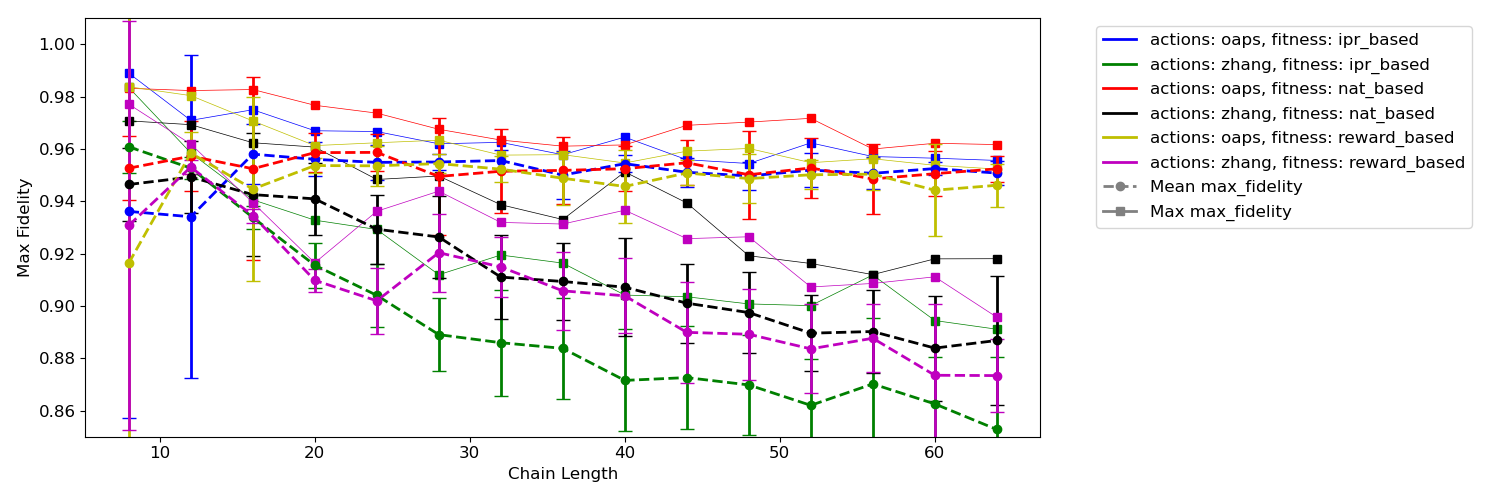

In [6]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'max_fidelity')
plt.ylabel('Max Fidelity')
plt.xlabel('Chain Length')
plt.ylim(0.85,1.01)
plt.tight_layout()

As one would expect, the first set of actions performs poorly for longer chains since it has less control sites. We are currently studying the minimum number of control sites required to achieve an acceptable transmission. Fitness function does not have such a strong effect on the achieved transmission probability but in the following section we will see that it does affect the behaviour of the transmission.

### CPU time

['ipr_oaps', 'ipr_zhang', 'nb_oaps', 'nb_zhang', 'rb_oaps', 'rb_zhang']


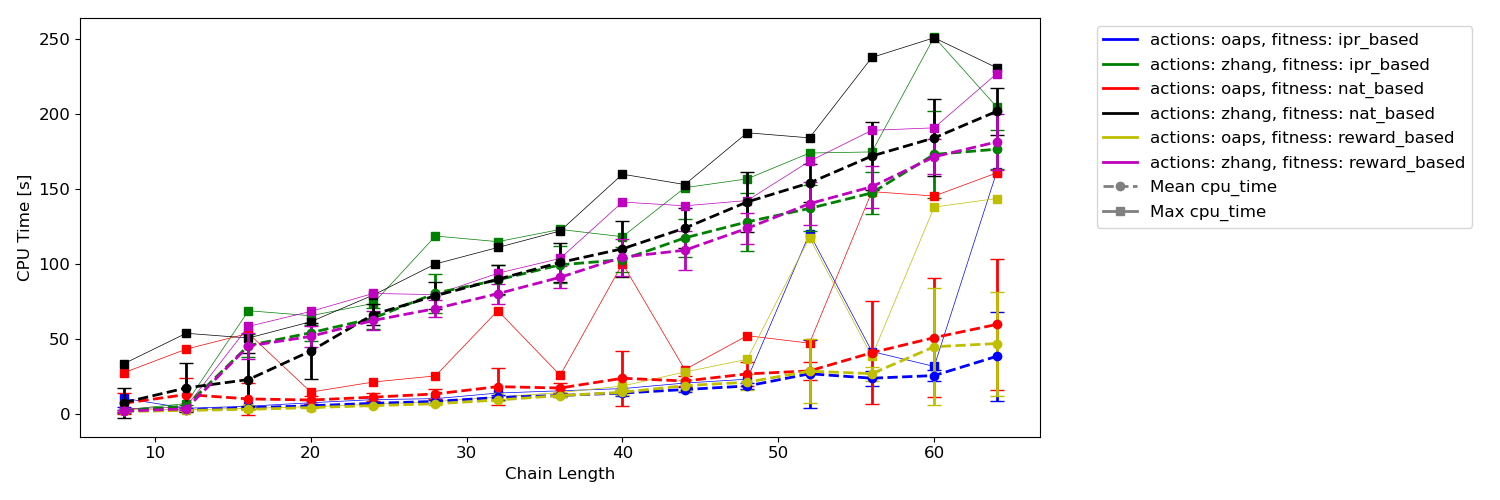

In [7]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'cpu_time')
plt.xlabel('Chain Length')
plt.ylabel('CPU Time [s]')
plt.tight_layout()

Even for long chains, the algorithm is really efficient. The longer times in worse performance scenarios have to do with the fact that if the algorithm does not converge it takes a longer total time since it performs more generations trying to find a better solution.

# Effect in the solution of different fitness functions

To study the effect of different fitness functions we can also study the behaviour of the transition probability over time. `plot_ga_solutions` will plot all solutions for a definite chain length in the provided directories. For example, the following graph shows all the solutions found for chains of length 16, using one action per site and the three different fitness functions.

['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_seq

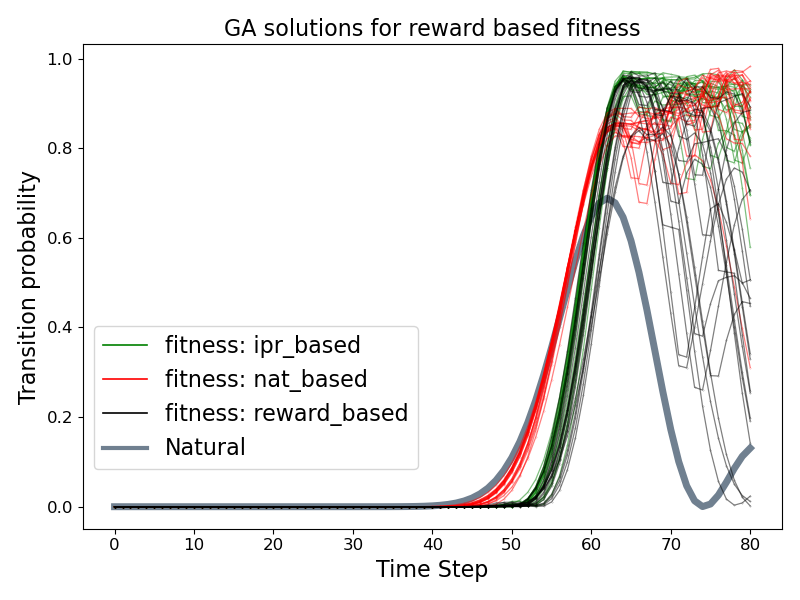

In [8]:
plt.figure(figsize=(8, 6))
plt.title('GA solutions for reward based fitness', fontsize=16)
n=16
plot_ga_solutions([nb_oaps,rb_oaps, ipr_oaps],n,add_natural=True,fs=16)


We can also plot only the max_fid solutions using `plot_max_fid_solutions`. The following graph shows clearly how using a fitness that rewards a behaviour similar to the natural evolution the found sequence adopts the shape of the natural evolution of the transition probability. Howeer, the scenario where we have a high transition probability over more time steps might be preferable.

['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9405409671811802 Max Index: 11
Max fid: 0.9396640855054943 Max Index: 12
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_samp

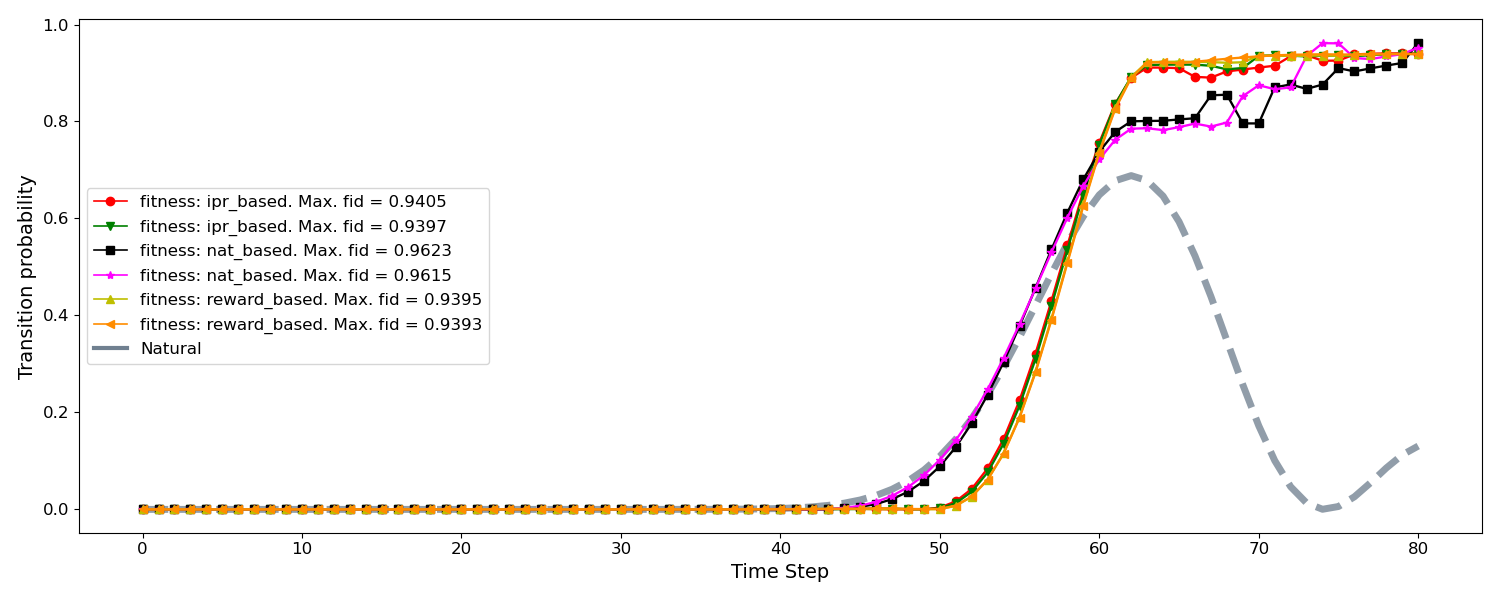

In [9]:
plt.figure(figsize=(15, 6))
plot_max_fid_solutions([nb_zhang,rb_zhang,ipr_zhang],16,add_natural=True,fs=14,nsamples=2)

['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9749522982256806 Max Index: 1
Max fid: 0.9717010898466233 Max Index: 9
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample

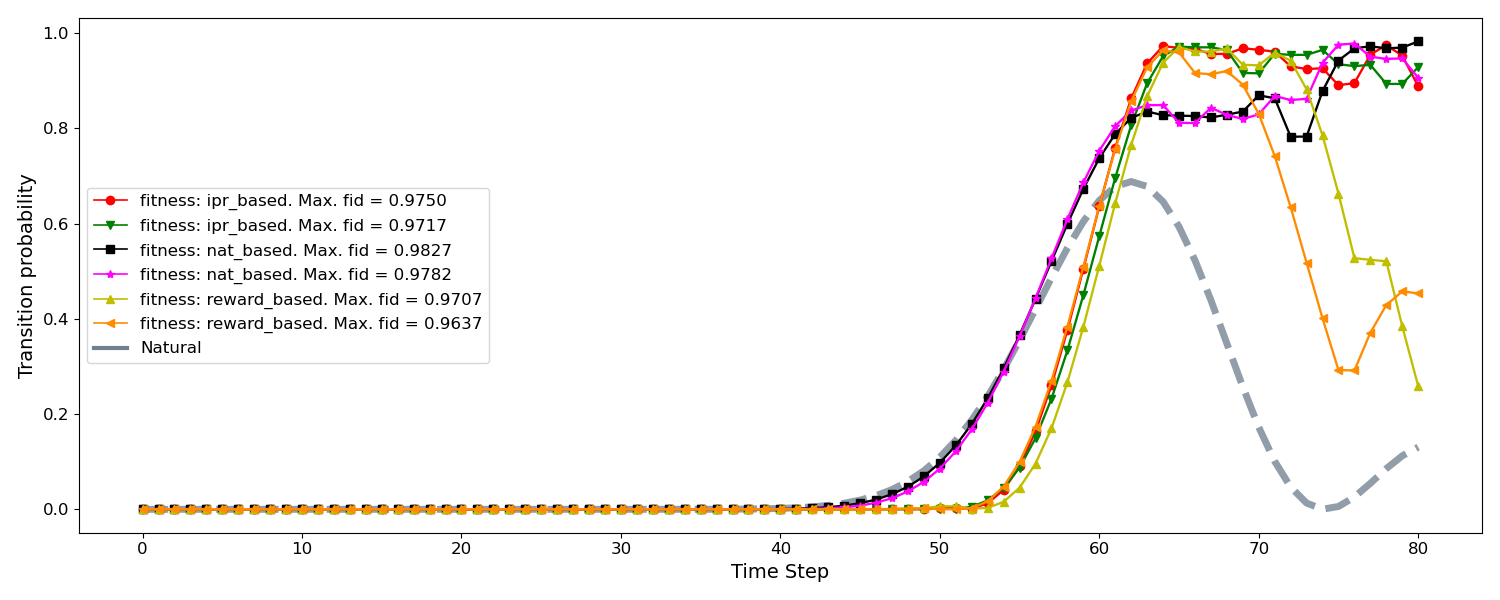

In [10]:
plt.figure(figsize=(15, 6))
plot_max_fid_solutions([nb_oaps, rb_oaps, ipr_oaps] ,16,add_natural=True,fs=14,nsamples=2)

The results improve when using one action per site which makes sense since more control sites are being employed, allowing greater fidelities.

We can test the limits of our method by imposing a lower tolerance. For example, taking tol = 0.01 or even lower. The following graph includes the results


['rb_oaps_ht', 'rb_oaps_t999', 'rb_zhang_ht']

Parameters with Different Values:
╒═════════════╤════════════════════════════════════════╤══════════════════════════════════════════╕
│ Parameter   │ genetic_algorithm_results/rb_oaps_ht   │ genetic_algorithm_results/rb_zhang_ht/   │
╞═════════════╪════════════════════════════════════════╪══════════════════════════════════════════╡
│ actions     │ oaps                                   │ zhang                                    │
├─────────────┼────────────────────────────────────────┼──────────────────────────────────────────┤
│ directory   │ rb_oaps_ht                             │ rb_zhang_ht                              │
╘═════════════╧════════════════════════════════════════╧══════════════════════════════════════════╛


directory,genetic_algorithm_results/rb_oaps_ht,genetic_algorithm_results/rb_zhang_ht/
Parameter,,
actions,oaps,zhang
directory,rb_oaps_ht,rb_zhang_ht


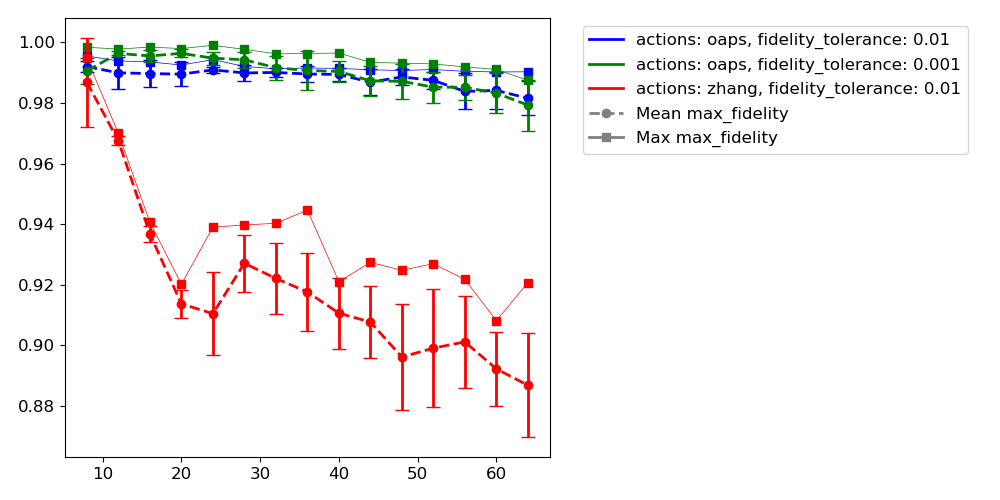

In [11]:
rb_zhang_ht = 'genetic_algorithm_results/rb_zhang_ht/'
rb_oaps_ht = 'genetic_algorithm_results/rb_oaps_ht'
rb_oaps_htt = 'genetic_algorithm_results/rb_oaps_t999'
plt.figure(figsize=(10,5))
plot_metric([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],column='max_fidelity')
plt.tight_layout()
directories = [rb_zhang_ht,rb_oaps_ht]
get_different_parameters(directories,print_params=True)

We can also inspect the behaviour of our solutions. Here we show the evolution of transmission fidelity for chain lengths of: 16,24 and 40 spins

['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9935379671355946 Max Index: 0
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat',

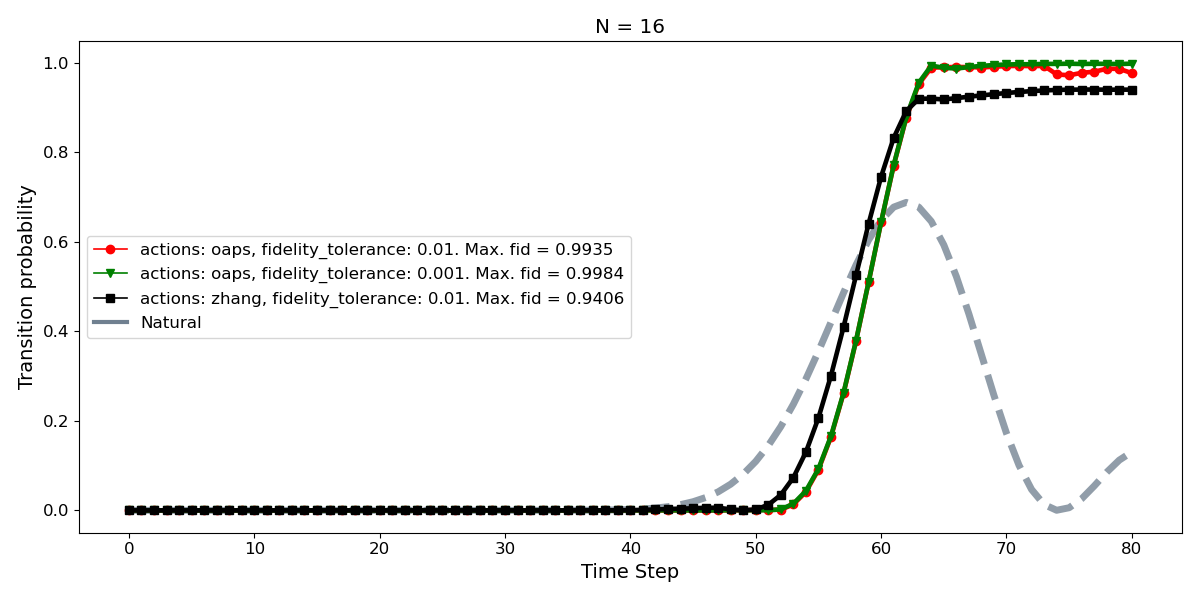

In [12]:
plt.figure(figsize=(12,6))
plt.title('N = 16')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],16,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample8.dat', 'act_sequence_n24_sample0.dat', 'act_sequence_n24_sample11.dat', 'act_sequence_n24_sample18.dat', 'act_sequence_n24_sample6.dat', 'act_sequence_n24_sample3.dat', 'act_sequence_n24_sample7.dat', 'act_sequence_n24_sample9.dat', 'act_sequence_n24_sample13.dat', 'act_sequence_n24_sample14.dat', 'act_sequence_n24_sample1.dat', 'act_sequence_n24_sample5.dat', 'act_sequence_n24_sample10.dat', 'act_sequence_n24_sample19.dat', 'act_sequence_n24_sample17.dat', 'act_sequence_n24_sample4.dat', 'act_sequence_n24_sample16.dat', 'act_sequence_n24_sample15.dat', 'act_sequence_n24_sample12.dat', 'config.ini']
Max fid: 0.9942918312281527 Max Index: 10
['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample8.dat', 'act_sequence_n24_sample0.dat', 'act_sequence_n24_sample11.dat', 'act_sequence_n24_sample18.dat', 'act_sequence_n24_sample6.dat', 'act_sequence_n24_sample3.dat', 'act_sequence_n24_sample7.dat', 'act_sequence_n24_sample9.dat', 'a

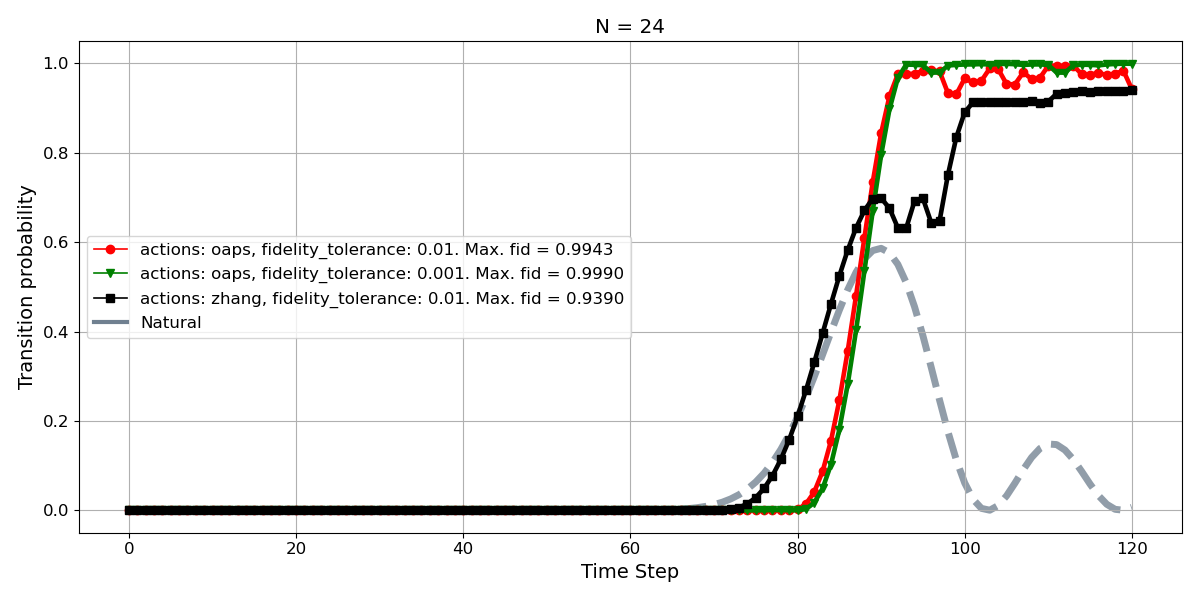

In [13]:
plt.figure(figsize=(12,6))
plt.title('N = 24')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],24,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.grid()
plt.show()

['act_sequence_n40_sample4.dat', 'act_sequence_n40_sample15.dat', 'act_sequence_n40_sample6.dat', 'act_sequence_n40_sample11.dat', 'act_sequence_n40_sample14.dat', 'act_sequence_n40_sample10.dat', 'act_sequence_n40_sample8.dat', 'act_sequence_n40_sample18.dat', 'act_sequence_n40_sample0.dat', 'act_sequence_n40_sample7.dat', 'act_sequence_n40_sample19.dat', 'act_sequence_n40_sample13.dat', 'act_sequence_n40_sample2.dat', 'act_sequence_n40_sample17.dat', 'act_sequence_n40_sample16.dat', 'act_sequence_n40_sample12.dat', 'act_sequence_n40_sample1.dat', 'act_sequence_n40_sample5.dat', 'act_sequence_n40_sample3.dat', 'config.ini', 'act_sequence_n40_sample9.dat']
Max fid: 0.9914098665046172 Max Index: 19
['act_sequence_n40_sample4.dat', 'act_sequence_n40_sample15.dat', 'act_sequence_n40_sample6.dat', 'act_sequence_n40_sample11.dat', 'act_sequence_n40_sample14.dat', 'act_sequence_n40_sample10.dat', 'act_sequence_n40_sample8.dat', 'act_sequence_n40_sample18.dat', 'act_sequence_n40_sample0.dat',

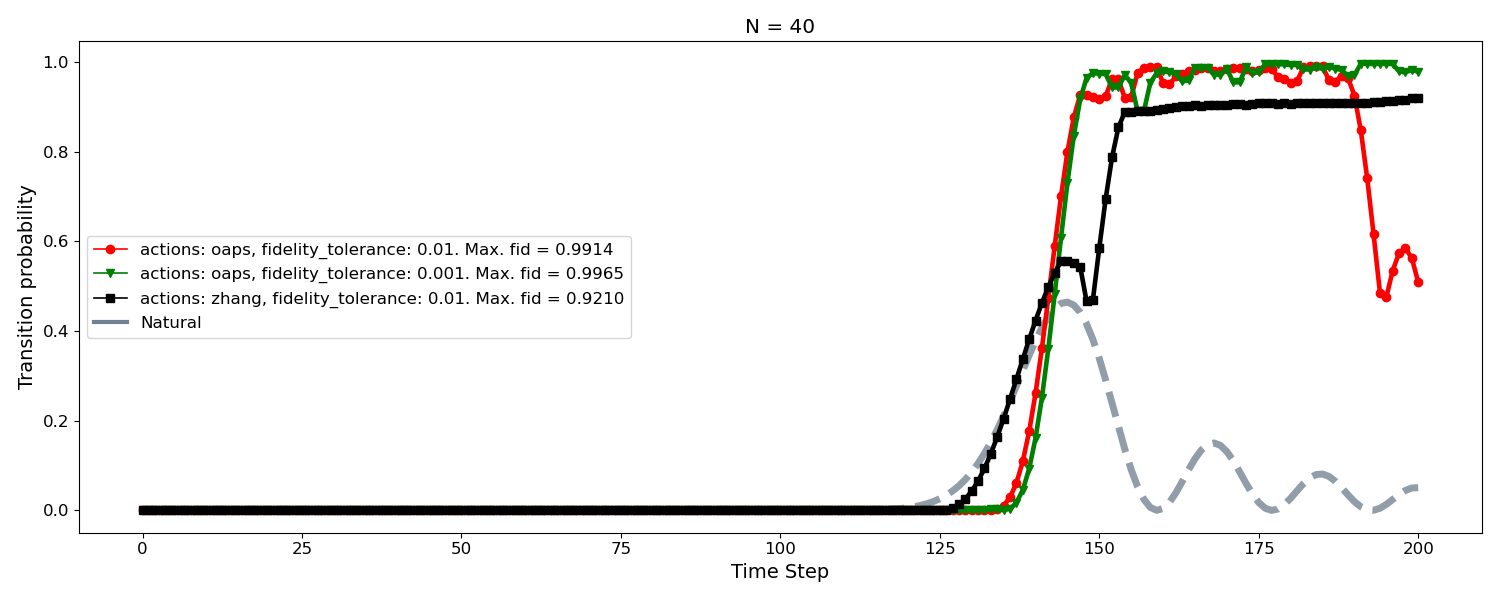

In [14]:
plt.figure(figsize=(15,6))
plt.title('N = 40')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],40,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

In [15]:

# import pickle

# # Replace 'file_path.pkl' with the path to your .pkl file
# with open('genetic_algorithm_results/n16_test_optuna/best_trial.pkl', 'rb') as file:
#     data = pickle.load(file)

# print(data)


['act_sequence_n32_sample4.dat', 'act_sequence_n32_sample6.dat', 'act_sequence_n32_sample5.dat', 'metrics_summary.csv', 'act_sequence_n32_sample3.dat', 'trial_1_data.csv', 'act_sequence_n32_sample2.dat', 'act_sequence_n32_sample7.dat', 'act_sequence_n32_sample1.dat', 'act_sequence_n32_sample9.dat', 'act_sequence_n32_sample8.dat', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9904173796212999 Max Index: 9
Max fid: 0.9901947578336228 Max Index: 3
Max fid: 0.9900076538523143 Max Index: 7
Max fid: 0.9898483978251151 Max Index: 3
Max fid: 0.9898070186328323 Max Index: 3
['act_sequence_n32_sample4.dat', 'act_sequence_n32_sample6.dat', 'act_sequence_n32_sample5.dat', 'metrics_summary.csv', 'act_sequence_n32_sample3.dat', 'act_sequence_n32_sample2.dat', 'act_sequence_n32_sample7.dat', 'act_sequence_n32_sample1.dat', 'act_sequence_n32_sample9.dat', 'act_sequence_n32_sample8.dat', 'act_sequence_n32_sample0.dat', 'trial_21_data.csv', 'updated_config.ini']
Max fid: 0.99648256938

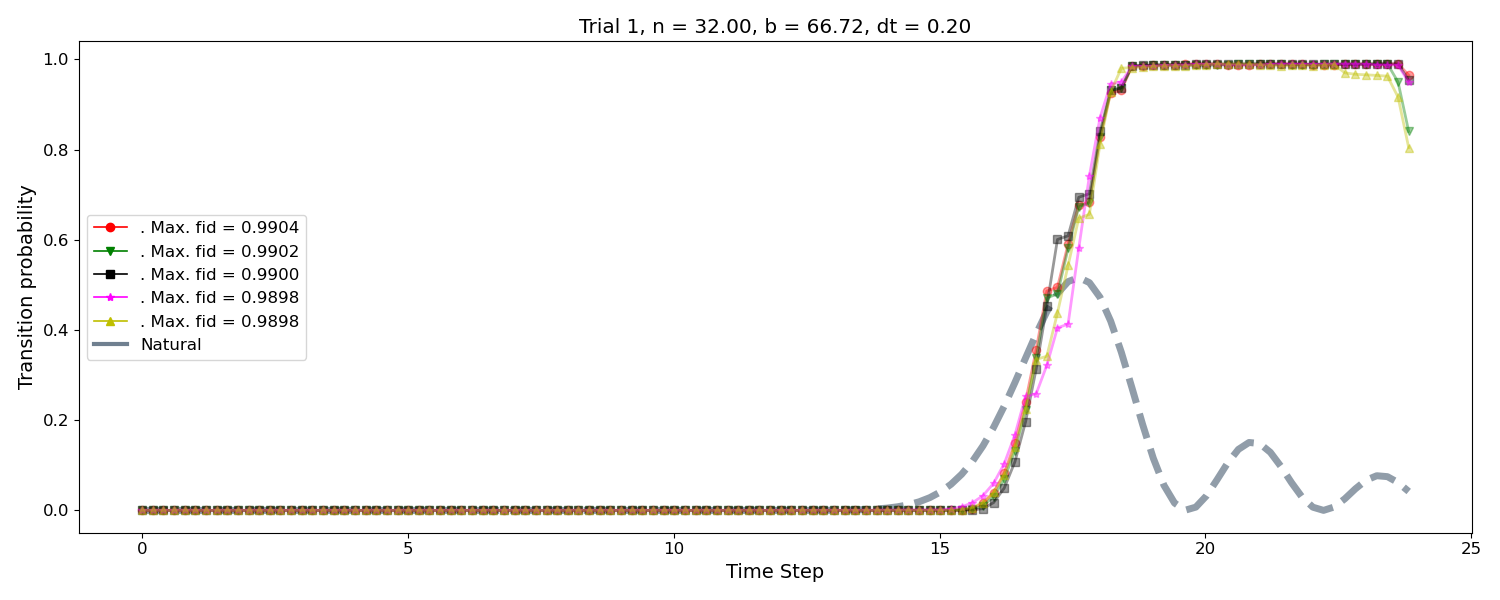

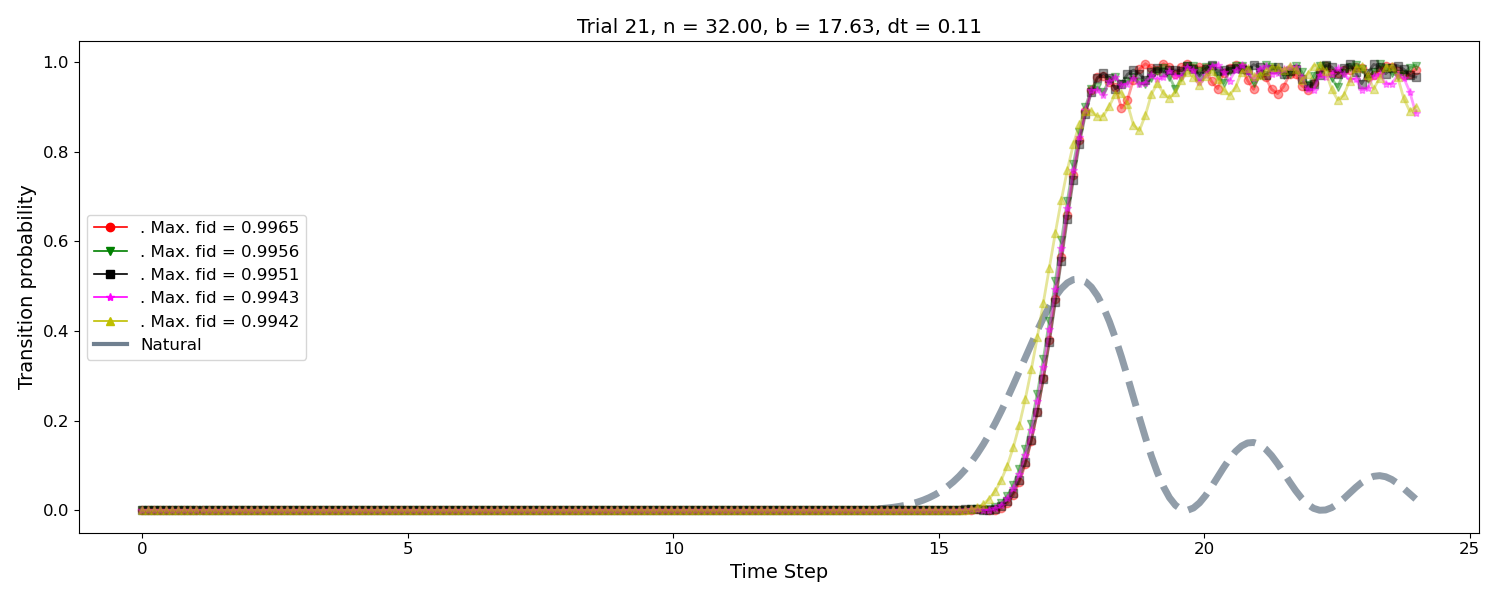

In [16]:
optuna_test = 'optuna_results/n32_max_fid_optuna'
plot_optuna_ga_trials(optuna_test,32, trials= [1,21],add_natural=True, fs=14, nsamples=5)

['trial_95_data.csv', 'act_sequence_n32_sample1.dat', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9951689263456269 Max Index: 1
['act_sequence_n32_sample3.dat', 'act_sequence_n32_sample2.dat', 'act_sequence_n32_sample1.dat', 'trial_77_data.csv', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9964214888500629 Max Index: 3
['act_sequence_n32_sample1.dat', 'trial_12_data.csv', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9897772676529488 Max Index: 1
['trial_82_data.csv', 'act_sequence_n32_sample1.dat', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9953564509732729 Max Index: 1
['trial_49_data.csv', 'act_sequence_n32_sample1.dat', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9941379489711791 Max Index: 1
['act_sequence_n32_sample1.dat', 'trial_97_data.csv', 'act_sequence_n32_sample0.dat', 'updated_config.ini']
Max fid: 0.9952325163058917 Max Index: 1
['act_sequence_n32_sample1.dat', 'trial_20

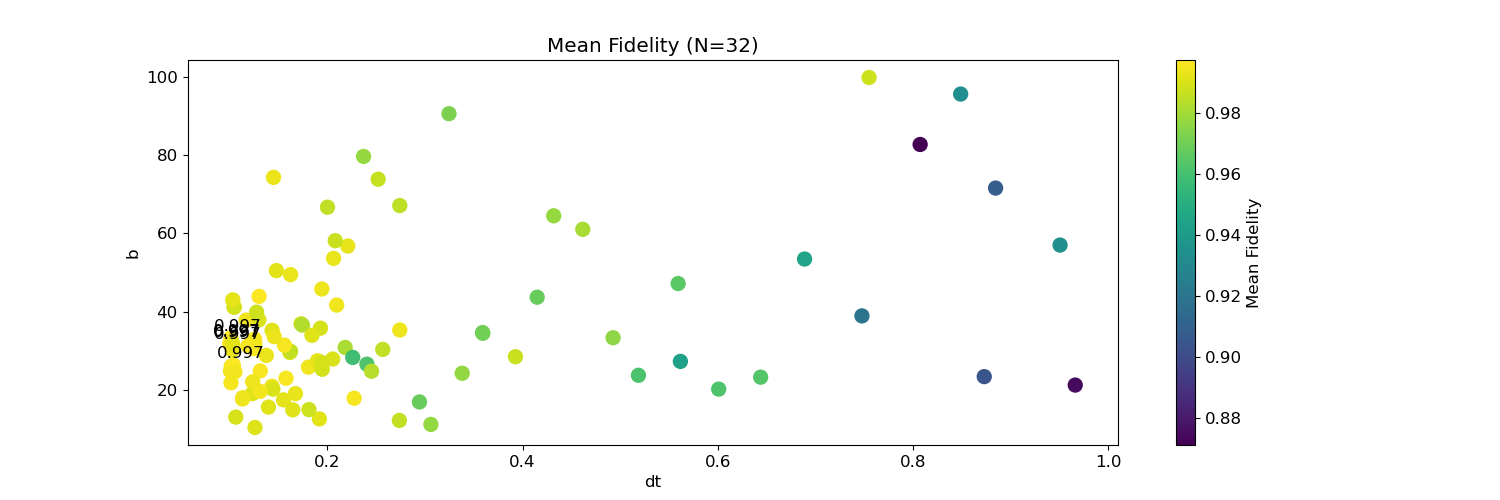

In [17]:
import numpy as np

optuna_test = 'optuna_results/n32_max_fid_optuna'

optuna_directories = [d for d in os.listdir(optuna_test) if os.path.isdir(os.path.join(optuna_test, d))]

results_data = {
    "Mean Fidelity": [],
    "Max Fidelity": [],
    "Mean Time": [],
    "dt": [],
    "b": [],
    "directory": [],
    "pruned": [],
}

for directory in optuna_directories:
    directory_path = os.path.join(optuna_test, directory)
    
    files = [f for f in os.listdir(directory_path) if f.endswith(".ini")]
    
    if len(files) != 1:
        print(f"Skipping directory {directory_path} because it does not contain exactly one .ini file.")
        raise Exception("There must be exactly one .ini file in the directory.")
    
    # Load the configuration file
    config = configparser.ConfigParser()
    config.read(os.path.join(directory_path, files[0]))
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    action_set = config.get("ga_initialization", "action_set")
    
    if "metrics_summary.csv" in os.listdir(directory_path):
        metrics_summary = pd.read_csv(os.path.join(directory_path, "metrics_summary.csv"))
        
        mean_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'max_fidelity'].values[0]
        max_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'max', 'max_fidelity'].values[0]
        mean_ttime = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'ttime'].values[0]
        
        results_data["Mean Fidelity"].append(mean_fidelity)
        results_data["Max Fidelity"].append(max_fidelity)
        results_data["Mean Time"].append(mean_ttime)
        results_data["dt"].append(dt)
        results_data["b"].append(b)
        results_data["directory"].append(directory)
        results_data["pruned"].append(False)
    else:
        
        act_sequences = [f for f in os.listdir(directory_path) if f.__contains__("sequence")]
        if len(act_sequences) == 0:
            print(f"Skipping directory {directory_path} because it does not contain any action sequence files.")
            continue
        if len(act_sequences) == 1:
            act_sequence = os.path.join(directory_path, act_sequences[0])
            n = config.getint("system_parameters", "n")
            
            act_sequence = np.genfromtxt(act_sequence, dtype=int)
            evolution = fid_evolution(action_sequence=act_sequence, nh=n, dt=dt, b=b, actions=action_set) 
            max_fidelity = np.max(evolution)
            ttime = np.argmax(evolution) * dt
            mean_fidelity = max_fidelity
            
            results_data["Mean Fidelity"].append(mean_fidelity)
            results_data["Max Fidelity"].append(max_fidelity)
            results_data["Mean Time"].append(ttime)
            results_data["dt"].append(dt)
            results_data["b"].append(b)
            results_data["directory"].append(directory)
            results_data["pruned"].append(True)
        
        else:
            if len(act_sequences) > 1:
                act_sequence = act_sequences[0]
                n = config.getint("system_parameters", "n")
                
                act_sequences = uniformize_data(
                    "ga", **{"directory": directory_path+'/', "n": n})
                
                max_fidelity,imax = find_max(action_sequences=act_sequences, nh=n, dt=dt, b=b, actions=action_set)
                evolution = fid_evolution(action_sequence=act_sequences[imax,:], nh=n, dt=dt, b=b, actions=action_set) 
                max_fidelity = np.max(evolution)
                ttime = np.argmax(evolution) * dt
                mean_fidelity = max_fidelity
                
                results_data["Mean Fidelity"].append(mean_fidelity)
                results_data["Max Fidelity"].append(max_fidelity)
                results_data["Mean Time"].append(ttime)
                results_data["dt"].append(dt)
                results_data["b"].append(b)
                results_data["directory"].append(directory)
                results_data["pruned"].append(True)
            
                
                    
results_df = pd.DataFrame(results_data)
print(results_df.head())
# Check for NaN values in the DataFrame
nan_values = results_df.isna().sum()
print("NaN values in each column:")
print(nan_values)
           
plt.figure(figsize=(15, 5))
scatter = plt.scatter(
    results_df["dt"], 
    results_df["b"], 
    c=results_df["Mean Fidelity"], 
    cmap="viridis",
    s=100  # Marker size
)
plt.xlabel("dt")
plt.ylabel("b")
plt.colorbar(scatter, label="Mean Fidelity")
plt.title("Mean Fidelity (N=32)")

# Annotate the best 5 points
top_5 = results_df.nlargest(5, "Mean Fidelity")
for _, row in top_5.iterrows():
    plt.annotate(
        f"{row['Mean Fidelity']:.3f}", 
        (row["dt"], row["b"]), 
        textcoords="offset points", 
        xytext=(5, 5), 
        ha="center"
    )

plt.show()       



['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample0.dat', 'act_sequence_n24_sample6.dat', 'act_sequence_n24_sample3.dat', 'act_sequence_n24_sample7.dat', 'act_sequence_n24_sample1.dat', 'trial_8_data.csv', 'act_sequence_n24_sample5.dat', 'act_sequence_n24_sample4.dat', 'updated_config.ini']
Max fid: 0.9854037334759514 Max Index: 3
['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample0.dat', 'trial_92_data.csv', 'act_sequence_n24_sample1.dat', 'updated_config.ini']
Max fid: 0.9977558446398643 Max Index: 1
['act_sequence_n24_sample0.dat', 'trial_82_data.csv', 'act_sequence_n24_sample1.dat', 'updated_config.ini']
Max fid: 0.9969359240231368 Max Index: 0
['trial_19_data.csv', 'act_sequence_n24_sample0.dat', 'act_sequence_n24_sample1.dat', 'updated_config.ini']
Max fid: 0.9911502704407263 Max Index: 0
['act_sequence_n24_sample0.dat', 'trial_66_data.csv', 'act_sequence_n24_sample1.dat', 'updated_config.ini']
Max fid: 0.9972855864691162 Max Index: 0
['act_sequence_n24_sample0.dat',

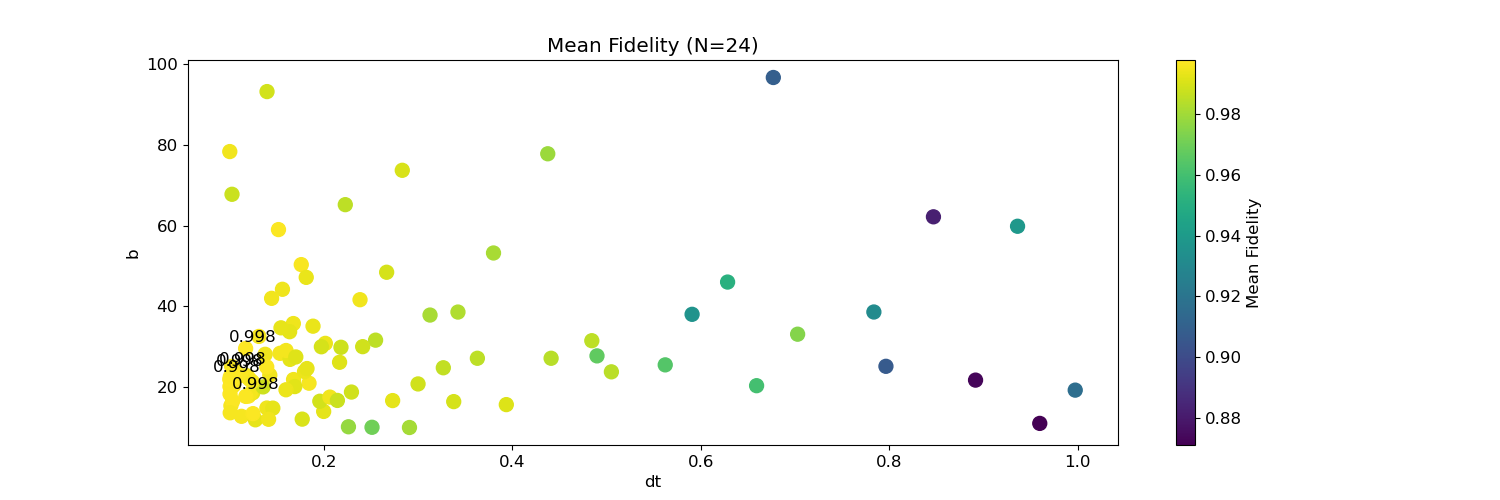

In [18]:
import numpy as np

optuna_test = 'optuna_results/n24_max_fid_optuna'

optuna_directories = [d for d in os.listdir(optuna_test) if os.path.isdir(os.path.join(optuna_test, d))]

results_data = {
    "Mean Fidelity": [],
    "Max Fidelity": [],
    "Mean Time": [],
    "dt": [],
    "b": [],
    "directory": [],
    "pruned": [],
}

for directory in optuna_directories:
    directory_path = os.path.join(optuna_test, directory)
    
    files = [f for f in os.listdir(directory_path) if f.endswith(".ini")]
    
    if len(files) != 1:
        print(f"Skipping directory {directory_path} because it does not contain exactly one .ini file.")
        raise Exception("There must be exactly one .ini file in the directory.")
    
    # Load the configuration file
    config = configparser.ConfigParser()
    config.read(os.path.join(directory_path, files[0]))
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    action_set = config.get("ga_initialization", "action_set")
    
    if "metrics_summary.csv" in os.listdir(directory_path):
        metrics_summary = pd.read_csv(os.path.join(directory_path, "metrics_summary.csv"))
        
        mean_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'max_fidelity'].values[0]
        max_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'max', 'max_fidelity'].values[0]
        mean_ttime = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'ttime'].values[0]
        
        results_data["Mean Fidelity"].append(mean_fidelity)
        results_data["Max Fidelity"].append(max_fidelity)
        results_data["Mean Time"].append(mean_ttime)
        results_data["dt"].append(dt)
        results_data["b"].append(b)
        results_data["directory"].append(directory)
        results_data["pruned"].append(False)
    else:
        
        act_sequences = [f for f in os.listdir(directory_path) if f.__contains__("sequence")]
        if len(act_sequences) == 0:
            print(f"Skipping directory {directory_path} because it does not contain any action sequence files.")
            continue
        if len(act_sequences) == 1:
            act_sequence = os.path.join(directory_path, act_sequences[0])
            n = config.getint("system_parameters", "n")
            
            act_sequence = np.genfromtxt(act_sequence, dtype=int)
            evolution = fid_evolution(action_sequence=act_sequence, nh=n, dt=dt, b=b, actions=action_set) 
            max_fidelity = np.max(evolution)
            ttime = np.argmax(evolution) * dt
            mean_fidelity = max_fidelity
            
            results_data["Mean Fidelity"].append(mean_fidelity)
            results_data["Max Fidelity"].append(max_fidelity)
            results_data["Mean Time"].append(ttime)
            results_data["dt"].append(dt)
            results_data["b"].append(b)
            results_data["directory"].append(directory)
            results_data["pruned"].append(True)
        
        else:
            if len(act_sequences) > 1:
                act_sequence = act_sequences[0]
                n = config.getint("system_parameters", "n")
                
                act_sequences = uniformize_data(
                    "ga", **{"directory": directory_path+'/', "n": n})
                
                max_fidelity,imax = find_max(action_sequences=act_sequences, nh=n, dt=dt, b=b, actions=action_set)
                evolution = fid_evolution(action_sequence=act_sequences[imax,:], nh=n, dt=dt, b=b, actions=action_set) 
                max_fidelity = np.max(evolution)
                ttime = np.argmax(evolution) * dt
                mean_fidelity = max_fidelity
                
                results_data["Mean Fidelity"].append(mean_fidelity)
                results_data["Max Fidelity"].append(max_fidelity)
                results_data["Mean Time"].append(ttime)
                results_data["dt"].append(dt)
                results_data["b"].append(b)
                results_data["directory"].append(directory)
                results_data["pruned"].append(True)
            
                
                    
results_df = pd.DataFrame(results_data)
print(results_df.head())
# Check for NaN values in the DataFrame
nan_values = results_df.isna().sum()
print("NaN values in each column:")
print(nan_values)
           
plt.figure(figsize=(15, 5))
scatter = plt.scatter(
    results_df["dt"], 
    results_df["b"], 
    c=results_df["Mean Fidelity"], 
    cmap="viridis",
    s=100  # Marker size
)
plt.xlabel("dt")
plt.ylabel("b")
plt.colorbar(scatter, label="Mean Fidelity")
plt.title("Mean Fidelity (N=24)")

# Annotate the best 5 points
top_5 = results_df.nlargest(5, "Mean Fidelity")
for _, row in top_5.iterrows():
    plt.annotate(
        f"{row['Mean Fidelity']:.3f}", 
        (row["dt"], row["b"]), 
        textcoords="offset points", 
        xytext=(5, 5), 
        ha="center"
    )

plt.show()       



['trial_76_data.csv', 'act_sequence_n36_sample0.dat', 'act_sequence_n36_sample1.dat', 'act_sequence_n36_sample2.dat', 'act_sequence_n36_sample3.dat', 'updated_config.ini']
Max fid: 0.9948897727324033 Max Index: 0
['trial_17_data.csv', 'act_sequence_n36_sample0.dat', 'act_sequence_n36_sample1.dat', 'updated_config.ini']
Max fid: 0.9872233033770781 Max Index: 0
['act_sequence_n36_sample0.dat', 'act_sequence_n36_sample1.dat', 'act_sequence_n36_sample2.dat', 'updated_config.ini', 'trial_29_data.csv']
Max fid: 0.9912632608145219 Max Index: 1
Skipping directory optuna_results/n36_max_fid_optuna/trial_99 because it does not contain any action sequence files.
['act_sequence_n36_sample0.dat', 'act_sequence_n36_sample1.dat', 'trial_7_data.csv', 'updated_config.ini']
Max fid: 0.9567924608865476 Max Index: 0
['act_sequence_n36_sample0.dat', 'act_sequence_n36_sample1.dat', 'act_sequence_n36_sample2.dat', 'trial_22_data.csv', 'updated_config.ini']
Max fid: 0.9892721626246155 Max Index: 1
['act_seque

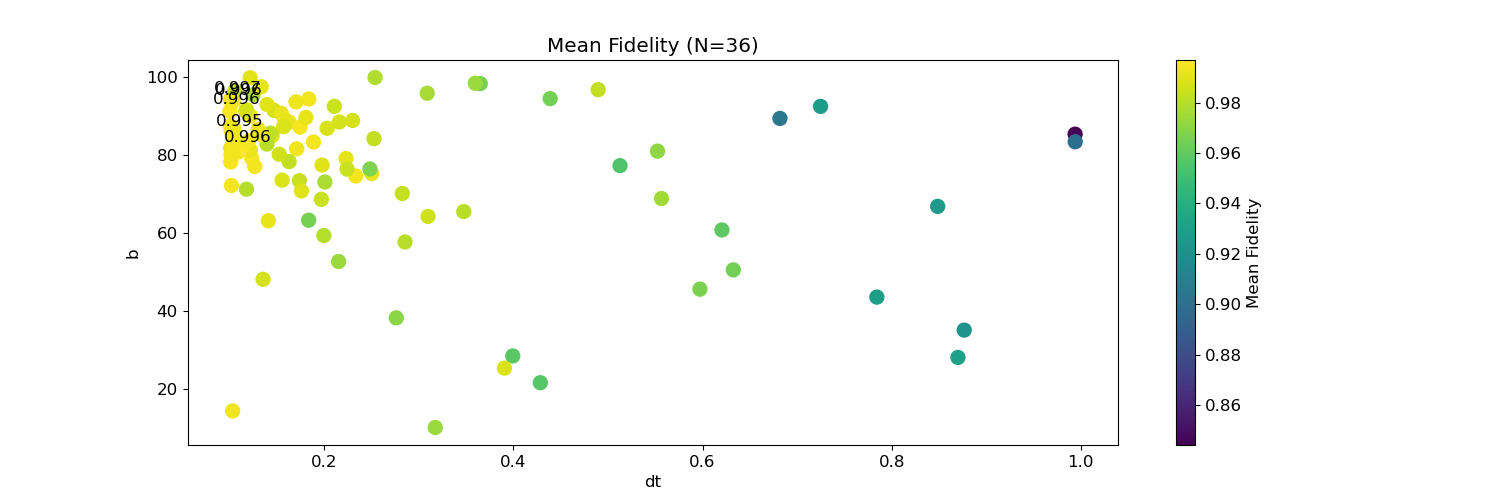

In [19]:
import numpy as np

optuna_test = 'optuna_results/n36_max_fid_optuna'

optuna_directories = [d for d in os.listdir(optuna_test) if os.path.isdir(os.path.join(optuna_test, d))]

results_data = {
    "Mean Fidelity": [],
    "Max Fidelity": [],
    "Mean Time": [],
    "dt": [],
    "b": [],
    "directory": [],
    "pruned": [],
}

for directory in optuna_directories:
    directory_path = os.path.join(optuna_test, directory)
    
    files = [f for f in os.listdir(directory_path) if f.endswith(".ini")]
    
    if len(files) != 1:
        print(f"Skipping directory {directory_path} because it does not contain exactly one .ini file.")
        raise Exception("There must be exactly one .ini file in the directory.")
    
    # Load the configuration file
    config = configparser.ConfigParser()
    config.read(os.path.join(directory_path, files[0]))
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    action_set = config.get("ga_initialization", "action_set")
    
    if "metrics_summary.csv" in os.listdir(directory_path):
        metrics_summary = pd.read_csv(os.path.join(directory_path, "metrics_summary.csv"))
        
        mean_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'max_fidelity'].values[0]
        max_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'max', 'max_fidelity'].values[0]
        mean_ttime = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'ttime'].values[0]
        
        results_data["Mean Fidelity"].append(mean_fidelity)
        results_data["Max Fidelity"].append(max_fidelity)
        results_data["Mean Time"].append(mean_ttime)
        results_data["dt"].append(dt)
        results_data["b"].append(b)
        results_data["directory"].append(directory)
        results_data["pruned"].append(False)
    else:
        
        act_sequences = [f for f in os.listdir(directory_path) if f.__contains__("sequence")]
        if len(act_sequences) == 0:
            print(f"Skipping directory {directory_path} because it does not contain any action sequence files.")
            continue
        if len(act_sequences) == 1:
            act_sequence = os.path.join(directory_path, act_sequences[0])
            n = config.getint("system_parameters", "n")
            
            act_sequence = np.genfromtxt(act_sequence, dtype=int)
            evolution = fid_evolution(action_sequence=act_sequence, nh=n, dt=dt, b=b, actions=action_set) 
            max_fidelity = np.max(evolution)
            ttime = np.argmax(evolution) * dt
            mean_fidelity = max_fidelity
            
            results_data["Mean Fidelity"].append(mean_fidelity)
            results_data["Max Fidelity"].append(max_fidelity)
            results_data["Mean Time"].append(ttime)
            results_data["dt"].append(dt)
            results_data["b"].append(b)
            results_data["directory"].append(directory)
            results_data["pruned"].append(True)
        
        else:
            if len(act_sequences) > 1:
                act_sequence = act_sequences[0]
                n = config.getint("system_parameters", "n")
                
                act_sequences = uniformize_data(
                    "ga", **{"directory": directory_path+'/', "n": n})
                
                max_fidelity,imax = find_max(action_sequences=act_sequences, nh=n, dt=dt, b=b, actions=action_set)
                evolution = fid_evolution(action_sequence=act_sequences[imax,:], nh=n, dt=dt, b=b, actions=action_set) 
                max_fidelity = np.max(evolution)
                ttime = np.argmax(evolution) * dt
                mean_fidelity = max_fidelity
                
                results_data["Mean Fidelity"].append(mean_fidelity)
                results_data["Max Fidelity"].append(max_fidelity)
                results_data["Mean Time"].append(ttime)
                results_data["dt"].append(dt)
                results_data["b"].append(b)
                results_data["directory"].append(directory)
                results_data["pruned"].append(True)
            
                
                    
results_df = pd.DataFrame(results_data)
print(results_df.head())
# Check for NaN values in the DataFrame
nan_values = results_df.isna().sum()
print("NaN values in each column:")
print(nan_values)
           
plt.figure(figsize=(15, 5))
scatter = plt.scatter(
    results_df["dt"], 
    results_df["b"], 
    c=results_df["Mean Fidelity"], 
    cmap="viridis",
    s=100  # Marker size
)
plt.xlabel("dt")
plt.ylabel("b")
plt.colorbar(scatter, label="Mean Fidelity")
plt.title("Mean Fidelity (N=36)")

# Annotate the best 5 points
top_5 = results_df.nlargest(5, "Mean Fidelity")
for _, row in top_5.iterrows():
    plt.annotate(
        f"{row['Mean Fidelity']:.3f}", 
        (row["dt"], row["b"]), 
        textcoords="offset points", 
        xytext=(5, 5), 
        ha="center"
    )

plt.show()       



['trial_95_data.csv', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.996765822820512 Max Index: 1
['trial_31_data.csv', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.9946198713546752 Max Index: 1
['act_sequence_n16_sample1.dat', 'trial_81_data.csv', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.9966084760925991 Max Index: 1
['trial_72_data.csv', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.9965457906390808 Max Index: 1
['trial_93_data.csv', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.996564558768266 Max Index: 1
['trial_33_data.csv', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample0.dat', 'updated_config.ini']
Max fid: 0.994627166790133 Max Index: 1
   Mean Fidelity  Max Fidelity  Mean Time        dt          b directory  \
0       0.984087      0.984087  1

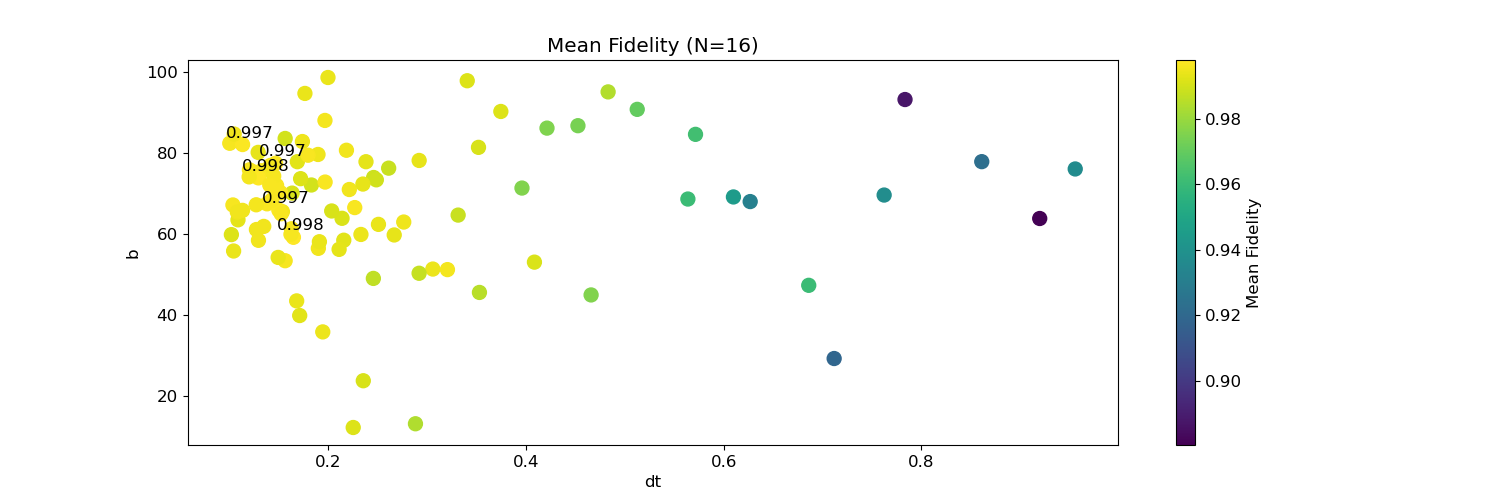

In [20]:
import numpy as np

optuna_test = 'optuna_results/n16_max_fid_optuna'

optuna_directories = [d for d in os.listdir(optuna_test) if os.path.isdir(os.path.join(optuna_test, d))]

results_data = {
    "Mean Fidelity": [],
    "Max Fidelity": [],
    "Mean Time": [],
    "dt": [],
    "b": [],
    "directory": [],
    "pruned": [],
}

for directory in optuna_directories:
    directory_path = os.path.join(optuna_test, directory)
    
    files = [f for f in os.listdir(directory_path) if f.endswith(".ini")]
    
    if len(files) != 1:
        print(f"Skipping directory {directory_path} because it does not contain exactly one .ini file.")
        raise Exception("There must be exactly one .ini file in the directory.")
    
    # Load the configuration file
    config = configparser.ConfigParser()
    config.read(os.path.join(directory_path, files[0]))
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    action_set = config.get("ga_initialization", "action_set")
    
    if "metrics_summary.csv" in os.listdir(directory_path):
        metrics_summary = pd.read_csv(os.path.join(directory_path, "metrics_summary.csv"))
        
        mean_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'max_fidelity'].values[0]
        max_fidelity = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'max', 'max_fidelity'].values[0]
        mean_ttime = metrics_summary.loc[metrics_summary['Unnamed: 0'] == 'mean', 'ttime'].values[0]
        
        results_data["Mean Fidelity"].append(mean_fidelity)
        results_data["Max Fidelity"].append(max_fidelity)
        results_data["Mean Time"].append(mean_ttime)
        results_data["dt"].append(dt)
        results_data["b"].append(b)
        results_data["directory"].append(directory)
        results_data["pruned"].append(False)
    else:
        
        act_sequences = [f for f in os.listdir(directory_path) if f.__contains__("sequence")]
        if len(act_sequences) == 0:
            print(f"Skipping directory {directory_path} because it does not contain any action sequence files.")
            continue
        if len(act_sequences) == 1:
            act_sequence = os.path.join(directory_path, act_sequences[0])
            n = config.getint("system_parameters", "n")
            
            act_sequence = np.genfromtxt(act_sequence, dtype=int)
            evolution = fid_evolution(action_sequence=act_sequence, nh=n, dt=dt, b=b, actions=action_set) 
            max_fidelity = np.max(evolution)
            ttime = np.argmax(evolution) * dt
            mean_fidelity = max_fidelity
            
            results_data["Mean Fidelity"].append(mean_fidelity)
            results_data["Max Fidelity"].append(max_fidelity)
            results_data["Mean Time"].append(ttime)
            results_data["dt"].append(dt)
            results_data["b"].append(b)
            results_data["directory"].append(directory)
            results_data["pruned"].append(True)
        
        else:
            if len(act_sequences) > 1:
                act_sequence = act_sequences[0]
                n = config.getint("system_parameters", "n")
                
                act_sequences = uniformize_data(
                    "ga", **{"directory": directory_path+'/', "n": n})
                
                max_fidelity,imax = find_max(action_sequences=act_sequences, nh=n, dt=dt, b=b, actions=action_set)
                evolution = fid_evolution(action_sequence=act_sequences[imax,:], nh=n, dt=dt, b=b, actions=action_set) 
                max_fidelity = np.max(evolution)
                ttime = np.argmax(evolution) * dt
                mean_fidelity = max_fidelity
                
                results_data["Mean Fidelity"].append(mean_fidelity)
                results_data["Max Fidelity"].append(max_fidelity)
                results_data["Mean Time"].append(ttime)
                results_data["dt"].append(dt)
                results_data["b"].append(b)
                results_data["directory"].append(directory)
                results_data["pruned"].append(True)
            
                
                    
results_df = pd.DataFrame(results_data)
print(results_df.head())
# Check for NaN values in the DataFrame
nan_values = results_df.isna().sum()
print("NaN values in each column:")
print(nan_values)
           
plt.figure(figsize=(15, 5))
scatter = plt.scatter(
    results_df["dt"], 
    results_df["b"], 
    c=results_df["Mean Fidelity"], 
    cmap="viridis",
    s=100  # Marker size
)
plt.xlabel("dt")
plt.ylabel("b")
plt.colorbar(scatter, label="Mean Fidelity")
plt.title("Mean Fidelity (N=16)")

# Annotate the best 5 points
top_5 = results_df.nlargest(5, "Mean Fidelity")
for _, row in top_5.iterrows():
    plt.annotate(
        f"{row['Mean Fidelity']:.3f}", 
        (row["dt"], row["b"]), 
        textcoords="offset points", 
        xytext=(5, 5), 
        ha="center"
    )

plt.show()       



# DRL results

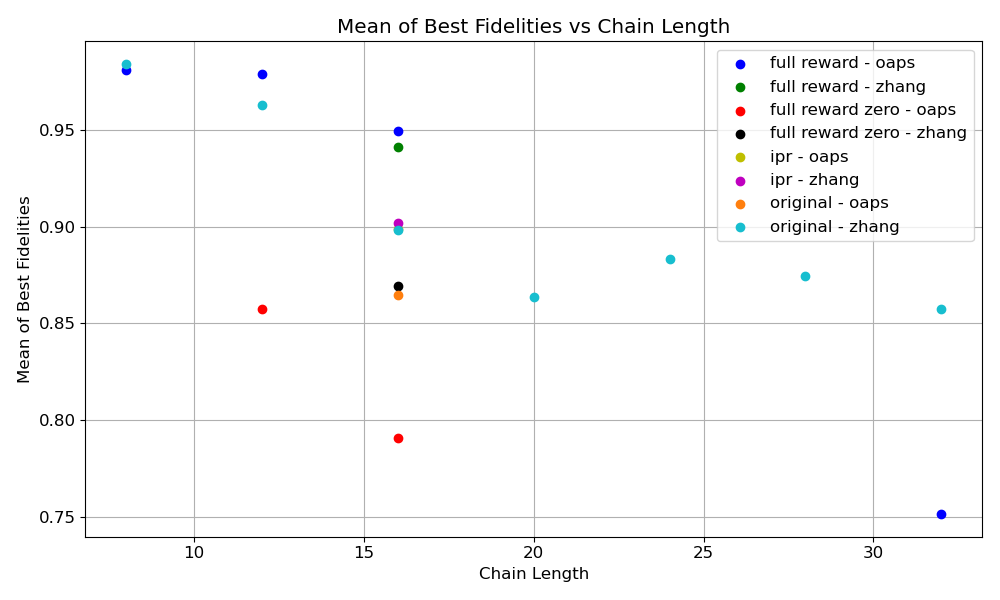

In [21]:
import configparser

drl_results_path = 'drl_results'
drl_experiments = [d for d in os.listdir(drl_results_path) if os.path.isdir(os.path.join(drl_results_path, d))]

results = []

for experiment in drl_experiments:
    experiment_path = os.path.join(drl_results_path, experiment)
    
    # Read parameters from config.ini
    config = configparser.ConfigParser()
    config.read(os.path.join(experiment_path, 'config.ini'))
    params = {section: dict(config.items(section)) for section in config.sections()}
    
    # Read best fidelities
    with open(os.path.join(experiment_path, 'best_fidelities.txt'), 'r') as f:
        fidelities = [float(line.strip()) for line in f.readlines()]
    
    # Calculate average of the 10 best fidelities
    avg_best_fidelities = np.mean(sorted(fidelities, reverse=True)[:10])
    
    # Flatten parameters and add average fidelity
    flat_params = {f"{section}_{key}": value for section, values in params.items() for key, value in values.items()}
    flat_params['avg_best_fidelities'] = avg_best_fidelities
    results.append(flat_params)

# Create a dataframe
drl_results_df = pd.DataFrame(results)
# Group by reward_function and action_set, then calculate the mean of avg_best_fidelities for each chain length
grouped = drl_results_df.groupby(['tags_reward_function', 'tags_action set', 'system_parameters_chain_length'])['avg_best_fidelities'].mean().reset_index()

# Convert chain length to numeric for proper plotting
grouped['system_parameters_chain_length'] = pd.to_numeric(grouped['system_parameters_chain_length'])

# Plot
plt.figure(figsize=(10, 6))
for (reward_function, action_set), group in grouped.groupby(['tags_reward_function', 'tags_action set']):
    plt.scatter(group['system_parameters_chain_length'], group['avg_best_fidelities'], label=f"{reward_function} - {action_set}")

plt.xlabel('Chain Length')
plt.ylabel('Mean of Best Fidelities')
plt.title('Mean of Best Fidelities vs Chain Length')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()